# Boston Housing Data project

## Introduction

#### This project uses a dataset on house prices in Boston from the US Census Service. It will generate and present various statistics to provide management with insights and aid their decisions. 

_First, we load the dataset and import the relevant libraries to the notebook._

In [61]:
import pandas as pd

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import statsmodels.api as sm
import scipy.stats

## Visualizations

#### In this section, we generate various graphs and explain our findings.

_We select an appropriate format to display each figure._

In [49]:
sns.set(style="whitegrid")

### Median Value of Owner-Occupied Homes

Text(0, 0.5, 'Value ($1000s)')

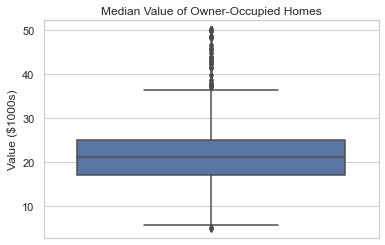

In [50]:
medv_box = sns.boxplot(y="MEDV", data=boston_df)

pyplot.title("Median Value of Owner-Occupied Homes")
pyplot.xlabel("")
pyplot.ylabel("Value ($1000s)")

##### Figure 1

_From Figure 1, we can estimate the median value as around 21 (or $21,000)._

### Bar Plot for the Charles River variable

Text(0.5, 1.0, 'Proximity of Tract to Charles River')

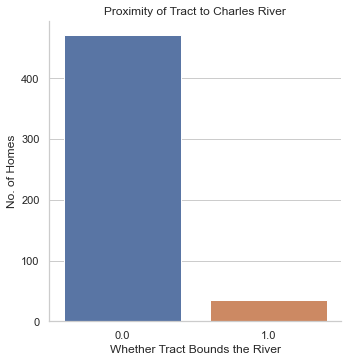

In [51]:
# Create a bar plot for the Charles River variable

chas_box = sns.catplot(x="CHAS", kind="count", data=boston_df)

# Label the figure for clarity

pyplot.xlabel("Whether Tract Bounds the River")
pyplot.ylabel("No. of Homes")
pyplot.title("Proximity of Tract to Charles River")

##### Figure 2

_From Figure 2, we can see that a large majority of homes are on a tract that does not bound the river._

### Box Plot for Median Value of Owner-Occupied Homes by Age Group

In [52]:
# Define each of the three age groups to be shown in the figure

agegroup_1 = boston_df.loc[(boston_df.AGE <= 35), 'age_group'] = '0-35 years'
agegroup_2 = boston_df.loc[((boston_df.AGE > 35)&(boston_df.AGE < 70)), 'age_group'] = '35-70 years'
agegroup_3 = boston_df.loc[(boston_df.AGE >= 70), 'age_group'] = '70+ years'

Text(0.5, 1.0, 'Median Value of Owner-Occupied Homes by Age Group')

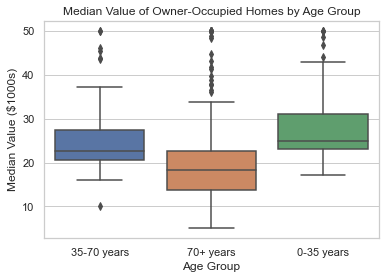

In [53]:
# Create a box plot for median value by age group

medvage_box = sns.boxplot(x='age_group', y='MEDV', data=boston_df)

# Label the figure for clarity

pyplot.xlabel("Age Group")
pyplot.ylabel("Median Value ($1000s)")
pyplot.title("Median Value of Owner-Occupied Homes by Age Group")

##### Figure 3

_From Figure 3, we can see an inverse correlation between Median Value and Age Group. In other words, the youngest age group (0-35 years) has the highest median value (estimate 25,000 USD) whereas the highest age group (70+ years) has the lowest median value (estimate 19,000 USD)._

### Scatter Plot for Nitric Oxide Concentration vs. Proportion Non-Retail Business Acres

Text(0.5, 1.0, 'Nitric Oxide Concentration vs. Non-Retail Business Acres')

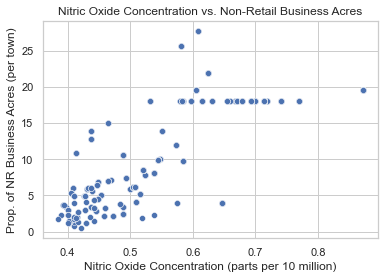

In [54]:
# Create a scatter plot for nitric oxide concentration vs. non-retail business acres

indusnox_scatter = sns.scatterplot(y='INDUS', x='NOX', data=boston_df)

# Label the figure for clarity

pyplot.xlabel("Nitric Oxide Concentration (parts per 10 million)")
pyplot.ylabel("Prop. of NR Business Acres (per town)")
pyplot.title("Nitric Oxide Concentration vs. Non-Retail Business Acres")

##### Figure 4

_From Figure 4, there is a relatively clear positive relationship between Nitric Oxide Concentration (NOC) and Proportion of Non-Retail Business Acres (NRBA). However, as the NOC increases above 0.6 parts per 10 million, the NRBA no longer increases and remains generally constant at 18 per town._

_It is therefore possible that 18 NRBA per town is a kind of threshold in terms of NOC level._

### Histogram for Pupil to Teacher Ratio

Text(0.5, 1.0, 'Pupil to Teacher Ratio')

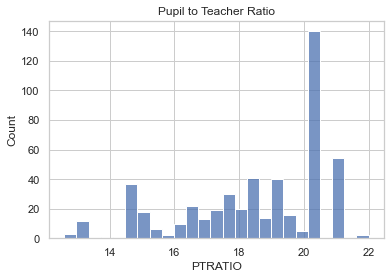

In [55]:
# Create a histogram for the pupil-teacher ratio

sns.histplot(boston_df.PTRATIO, kde=False, bins=25)

# Clarify the figure with a title

pyplot.title("Pupil to Teacher Ratio")


##### Figure 5

_From Figure 5, there is a relatively even distribution of pupil-teacher ratios when the ratio is below 20; for these ratios, the count is between 0 and 40. However, when the ratio is above 20, there is one ratio with a count of around 140. Due to this outlier count being so large, it is possible this ratio represents a common "standard" class size with respect to the data._

## Task 5: Use the appropriate tests to answer the questions provided.

_First, we specify the value of α to be used in the tests:_

__α = 0.05__

### Test 1

#### Is there a significant difference in Median Value of Homes bounded by the Charles River?

__Hypothesis__

Null hypothesis, $H_0:$ There is no difference between the median value of houses bounded by the Charles River and those not bounded.

Alternative hypothesis, $H_a:$ There is a difference in between the median value of houses bounded by the Charles River and those not bounded.


In [56]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV, boston_df[boston_df.CHAS == 0].MEDV)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

__Findings__

_We can see that the P-value (~7.391e-05) is less than 0.05 (the value for α). Therefore, we __reject the null hypothesis__ $H_0$ and __conclude that there is a significant difference__ between the median value of houses bounded by the Charled River and those not bounded._

### Test 2

#### Is there a difference in Median Values of Homes for each proportion of Owner-Occupied Homes (built prior to 1940)?

Null hypothesis, $H_0:$ There is no difference in median values of houses for owner-occupied homes built prior to 1940.

Alternative hypothesis, $H_a:$ There is a difference in median values of houses for owner-occupied homes built prior to 1940.

In [81]:
boston_df.loc[(boston_df.AGE > 82), 'age_span'] = 'before 1940'
boston_df.loc[(boston_df.AGE <= 82), 'age_span'] = 'after 1940'

before_1940 = boston_df.loc[(boston_df.AGE > 82), 'age_span'] == 'before 1940'
after_1940 = boston_df.loc[(boston_df.AGE <= 82), 'age_span'] == 'after 1940'

In [82]:
scipy.stats.levene(boston_df[boston_df.age_span=='before 1940']['MEDV'], boston_df[boston_df.age_span=='after 1940']['MEDV'], center='mean')

LeveneResult(statistic=1.581350317246268, pvalue=0.2091486621949195)

##### Equality of Variance

_We can see that the P-value (~0.209) is greater that 0.05 (the value for α). Therefore, for the variables before_1940 and after_1940, __the variances are equal__._

_As a result, we can assume that we will __fail to reject the null hypothesis__ $H_0$ and __assume that there is no significant difference__ between the median values._

In [85]:
f_statistic, p_value = scipy.stats.f_oneway(before_1940, after_1940)
print("fstatistic: {0}, pvalue: {1}".format(f_statistic, p_value))

fstatistic: nan, pvalue: nan


__Findings__

_We can see that the one-way ANOVA test is inconclusive for this data._

_However, based on the findings for our equality of variance test, we __fail to reject the null hypothesis__ $H_0$ and __assume that there is no significant difference__ between the median values._

### Test 3

####  Is there a relationship between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres per Town? 

Null hypothesis, $H_0:$ There is no relationship between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres per Town.

Alternative hypothesis, $H_a:$: There is a relationship between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres per Town.

In [84]:
scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)

(0.7636514469209149, 7.913361061240043e-98)

__Findings__

_We can see that the P-value (~7.912e-98) is less than 0.05 (the value for α). Therefore, we __reject the null hypothesis__ $H_0$ and __conclude that there exists a relationship__ between nitric oxide concentrations and proportion of non-retail business acres per town._

_Moreover, not only is there a relationship between the two variables, but we can conclude that there is a __direct correlation__ between them as we have a positive r-value. This is consistent with the scatter plot in Figure 4._

### Test 4

#### Impact of an additional Weighted Distance to the Five Boston Employment Centres on the Median Value of Owner-Occupied Homes

In [76]:
dis_var = boston_df['DIS']

medv_var = boston_df['MEDV']

In [77]:
dis_var = sm.add_constant(dis_var)

model = sm.OLS(medv_var, dis_var).fit()
predictions = model.predict(dis_var)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           1.21e-08
Time:                        18:03:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Findings__

_From the OLS Regression Results, we can see the variable DIS has a coefficient of 1.0916 (with standard error 0.188). Therefore, the impact on the median value of owner-occupied homes of the additional weighted distance to the five Boston employment centres is a __factor of 1.0916__._

## Conclusion

#### Using the dataset on house prices in Boston from the US Census Service, this project has provided various figures and statistical tests. We hope the findings will provide management with relevant insights for their decisions. 